In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Read the dataframes

In [2]:
df1 = pd.read_csv(r'D:\Docs\Datasets\Penguin dataset\penguins_size.csv')
df2 = pd.read_csv(r'D:\Docs\Datasets\Penguin dataset\penguins_lter.csv')

### Check the columns

In [3]:
print(df1.columns)
print(df2.columns)

Index(['species', 'island', 'culmen_length_mm', 'culmen_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')
Index(['studyName', 'Sample Number', 'Species', 'Region', 'Island', 'Stage',
       'Individual ID', 'Clutch Completion', 'Date Egg', 'Culmen Length (mm)',
       'Culmen Depth (mm)', 'Flipper Length (mm)', 'Body Mass (g)', 'Sex',
       'Delta 15 N (o/oo)', 'Delta 13 C (o/oo)', 'Comments'],
      dtype='object')


Columns like island, culmen_length, culmen_depth, flipper_length, body_mass, sex are repeated. Even the target variable looks same

In [4]:
#Sanity check
print('Column island is same') if sum(df1['island'] == df2['Island']) == df1.shape[0] else print('Different Columns')
print('Column culmen_length is same') if sum(df1['island'] == df2['Island']) == df1.shape[0] else print('Different Columns')
print('Column culmen_depth is same') if sum(df1['island'] == df2['Island']) == df1.shape[0] else print('Different Columns')
print('Column flipper_length is same') if sum(df1['island'] == df2['Island']) == df1.shape[0] else print('Different Columns')
print('Column body_mass is same') if sum(df1['island'] == df2['Island']) == df1.shape[0] else print('Different Columns')
print('Column sex is same') if sum(df1['island'] == df2['Island']) == df1.shape[0] else print('Different Columns')
print('Column species is same') if sum(pd.factorize(df1['species'])[0] == pd.factorize(df2['Species'])[0]) == df1.shape[0] else print('Different')

Column island is same
Column culmen_length is same
Column culmen_depth is same
Column flipper_length is same
Column body_mass is same
Column sex is same
Column species is same


#### All columns of dataframe 1 are the same as dataframe 2 so we can drop the dataframe and use the second one

In [5]:
df = df2.copy()

In [6]:
df.head()

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,11/11/07,39.1,18.7,181.0,3750.0,MALE,NaN,NaN,Not enough blood for isotopes.
1,PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,11/11/07,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454,NaN
2,PAL0708,3,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,11/16/07,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302,NaN
3,PAL0708,4,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A2,Yes,11/16/07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adult not sampled.
4,PAL0708,5,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,11/16/07,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426,NaN


#### Checking the target variable and number of classes

In [7]:
df['Species'].value_counts()

Adelie Penguin (Pygoscelis adeliae)          152
Gentoo penguin (Pygoscelis papua)            124
Chinstrap penguin (Pygoscelis antarctica)     68
Name: Species, dtype: int64

#### So there are 3 classes to classify (Multi Class Classfication)
#### Doing a label encoding for the classes

In [8]:
df['Species'], uniq = pd.factorize(df['Species'])

In [9]:
print(uniq)

Index(['Adelie Penguin (Pygoscelis adeliae)',
       'Chinstrap penguin (Pygoscelis antarctica)',
       'Gentoo penguin (Pygoscelis papua)'],
      dtype='object')


#### Dropping sample number as its just continuous numbers and checking if there is any relation between individual id and target

In [10]:
from scipy.stats import spearmanr
x = pd.factorize(df['Individual ID'])[0]
print(spearmanr(x,df['Species'])[0])

0.12237375147657542


#### The spearman correlation co efficient is very less so we can drop the columns

In [11]:
df.drop(['Sample Number','Individual ID'],axis=1,inplace=True)

## Analysing Numeric features

In [12]:
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O' and feature != 'Species']

In [13]:
print(df[numeric_features].head())

   Culmen Length (mm)  Culmen Depth (mm)  Flipper Length (mm)  Body Mass (g)  \
0                39.1               18.7                181.0         3750.0   
1                39.5               17.4                186.0         3800.0   
2                40.3               18.0                195.0         3250.0   
3                 NaN                NaN                  NaN            NaN   
4                36.7               19.3                193.0         3450.0   

   Delta 15 N (o/oo)  Delta 13 C (o/oo)  
0                NaN                NaN  
1            8.94956          -24.69454  
2            8.36821          -25.33302  
3                NaN                NaN  
4            8.76651          -25.32426  


#### Check Missing values and relation between them with target variables

In [14]:
for feature in numeric_features:
    print(f'{feature} has {df[feature].isnull().sum()} null values')

Culmen Length (mm) has 2 null values
Culmen Depth (mm) has 2 null values
Flipper Length (mm) has 2 null values
Body Mass (g) has 2 null values
Delta 15 N (o/oo) has 14 null values
Delta 13 C (o/oo) has 13 null values


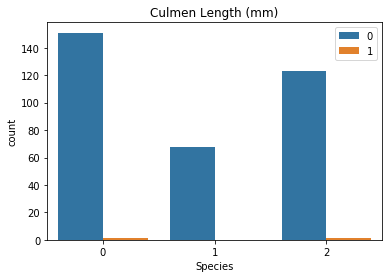

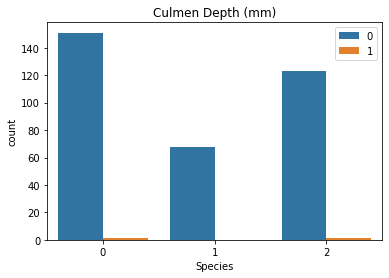

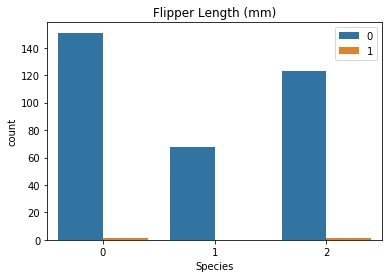

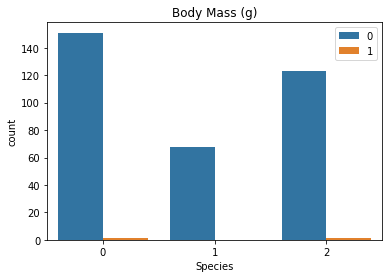

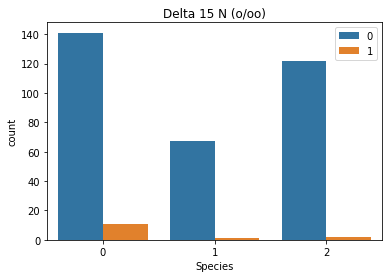

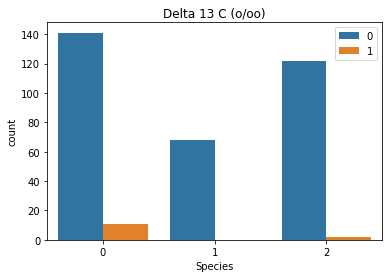

In [15]:
for feature in numeric_features:
    data = df[feature].copy()
    data = np.where(data.isnull(),1,0)
    sns.countplot(df['Species'],hue=data)
    plt.title(feature)
    plt.show()

1) Culmen Length has 2 missing values one of class 0 and other in class 2

2) CUlmen Depth has 2 missing values one of class 0 and other in class 2

3) Flipper Length has 2 missing values one of class 0 and other in class 2

4) Body Mass has 2 missing values one of class 0 and other in class 2

5) Delta 15 has 14 missing values most belonging to class 1 (if Delta 15 has missing value most probably its class 0)

6) Delta 13 has 13 missing values most belonging to class 1 and no value in class 2 (if Delta 13 has missing value its not class 1)

### Checking the distribution of Numeric features

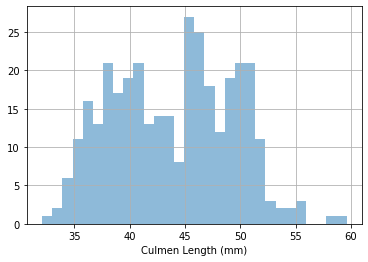

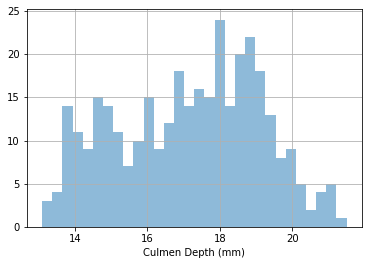

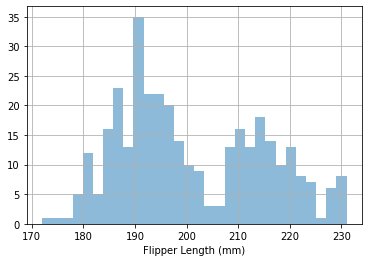

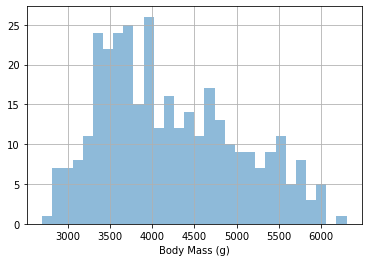

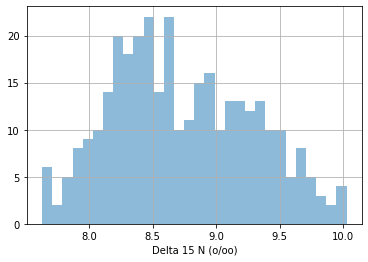

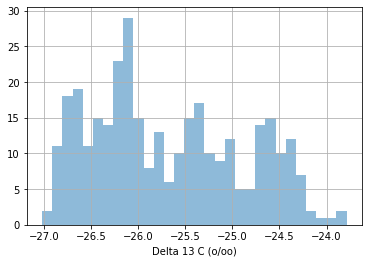

In [16]:
for feature in numeric_features:
    df[feature].hist(bins=30,alpha=0.5)
    plt.xlabel(feature)
    plt.show()

#### Almost all columns don't follow gaussian distribution. Culmen length,depth  and Delta 15 N looks little bit like gaussian distribution

#### Transforming each numeric feature into normal distribution

In [17]:
import scipy.stats as stats
import pylab
def q_q_plot(df,feature,transform):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    df[feature].hist(bins=30,alpha=0.5)
    plt.xlabel(transform)
    plt.subplot(1,2,2)
    stats.probplot(df[feature],dist='norm',plot=pylab)
    plt.show()

In [18]:
def plot_different_transformations(feature):
    data = df.copy()
    q_q_plot(data,feature,'org')
    
    data[feature] = np.log(df[feature])
    q_q_plot(data,feature,'log')
    
    data[feature] = np.sqrt(df[feature])
    q_q_plot(data,feature,'sqrt')
    
    data[feature] = 1.0/(df[feature])
    q_q_plot(data,feature,'rec')
    
    data[feature] = stats.boxcox(df[feature])[0]
    q_q_plot(data,feature,'boxcox')

#### Column Flipper Length

C:\Users\siddh\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
C:\Users\siddh\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
C:\Users\siddh\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


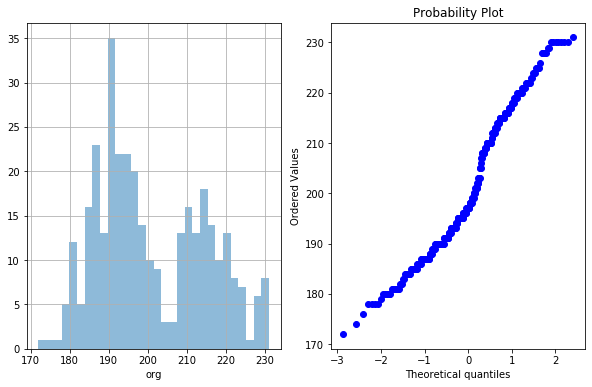

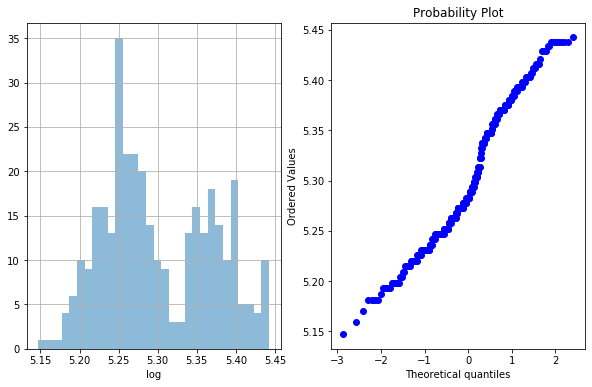

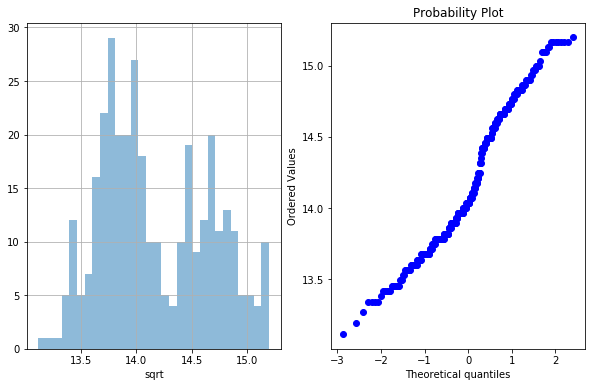

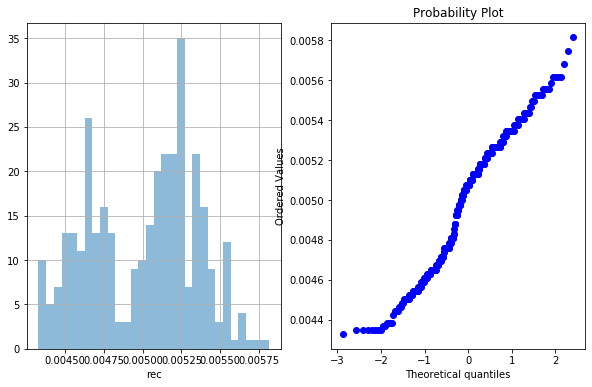

C:\Users\siddh\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1044: RuntimeWarning: invalid value encountered in less_equal
  if any(x <= 0):


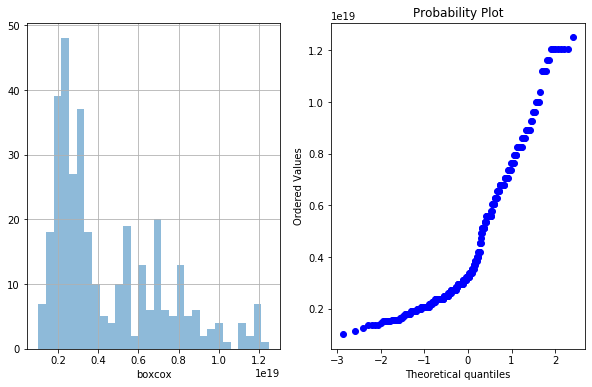

In [19]:
plot_different_transformations('Flipper Length (mm)')

In [20]:
#Sqrt transform distribution is quite good compared to the orginal
df['Flipper Length (mm)'] = np.sqrt(df['Flipper Length (mm)'])

#### Column Body Mass

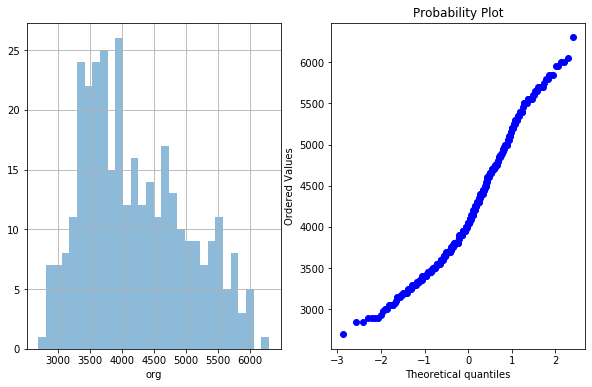

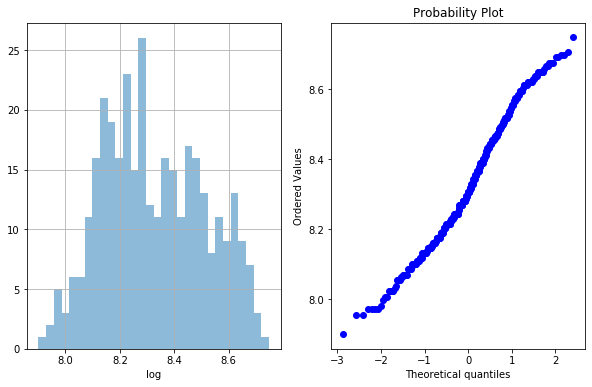

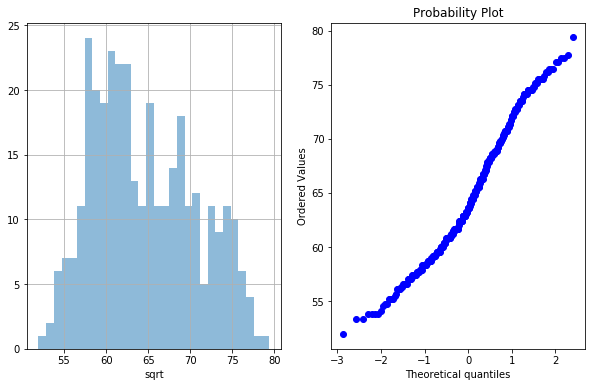

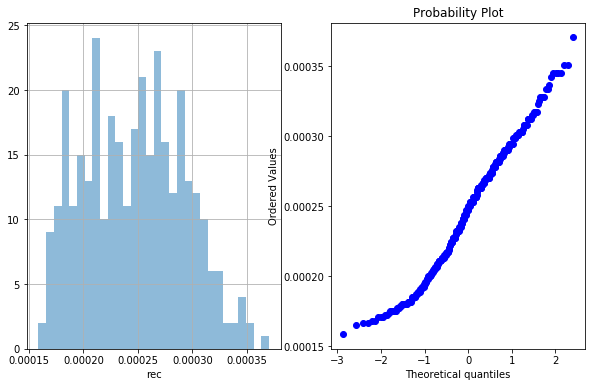

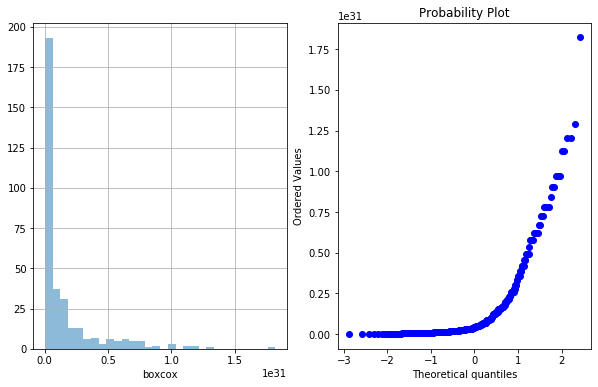

In [21]:
plot_different_transformations('Body Mass (g)')

In [22]:
### Log transformation decreases skewness little
df['Body Mass (g)'] = np.log(df['Body Mass (g)'])

#### Column Delta 13 has a lot of negative values so we will keep it as it is

#### Checking for outliers

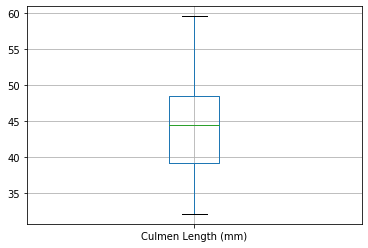

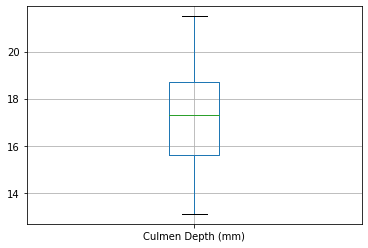

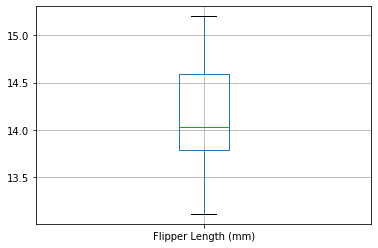

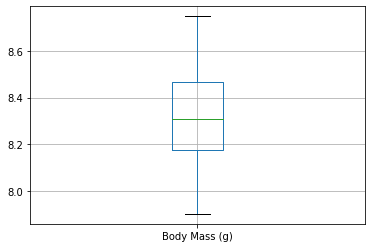

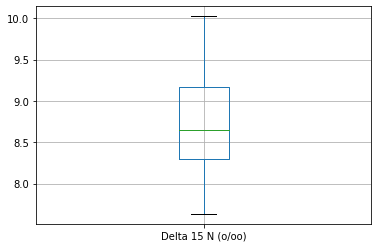

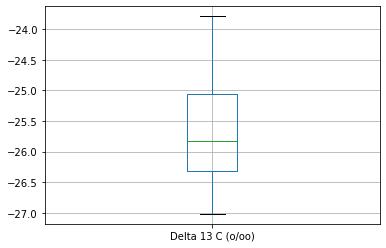

In [23]:
for feature in numeric_features:
    df.boxplot(column=feature)
    plt.show()

#### Looks like there are no outliers to be handled

### Filling in missing values

#### Since only delta columns have a lot of missing values so extra columns will be created only for them. Other NaN values will be filled with median values

In [35]:
for feature in numeric_features:
    print(df.groupby('Island')[feature].median())

Island
Biscoe       45.80
Dream        44.65
Torgersen    38.90
Name: Culmen Length (mm), dtype: float64
Island
Biscoe       15.5
Dream        18.4
Torgersen    18.4
Name: Culmen Depth (mm), dtype: float64
Island
Biscoe       14.628739
Dream        13.892444
Torgersen    13.820275
Name: Flipper Length (mm), dtype: float64
Island
Biscoe       8.471149
Dream        8.212698
Torgersen    8.216088
Name: Body Mass (g), dtype: float64
Island
Biscoe       8.35599
Dream        9.23408
Torgersen    8.86853
Name: Delta 15 N (o/oo), dtype: float64
Island
Biscoe      -26.186810
Dream       -24.746525
Torgersen   -25.897410
Name: Delta 13 C (o/oo), dtype: float64


#### Almost means are near to each other so need not have fill different means and mainly we have to focus on Delta 15 and Delta 13 because they have more missing values

In [24]:
for feature in numeric_features:
    if feature in ['Delta 13 C (o/oo)','Delta 15 N (o/oo)']:
        df[feature+'NaN'] = np.where(df[feature].isnull(),1,0)
    df[feature] = df[feature].fillna(df[feature].median())

### Analysing Categorical and Object Features

In [25]:
cat_features = [feature for feature in df.columns if df[feature].dtype == 'O' and feature != 'Species' and feature != 'Date Egg']

#### Checking Missing Values and relation of it with target value

In [26]:
for feature in cat_features:
    print(f'{feature} has {df[feature].isnull().sum()} null values')

studyName has 0 null values
Region has 0 null values
Island has 0 null values
Stage has 0 null values
Clutch Completion has 0 null values
Sex has 10 null values
Comments has 318 null values


In [27]:
for feature in cat_features:
    print(df[feature].value_counts())
    print()

PAL0910    120
PAL0809    114
PAL0708    110
Name: studyName, dtype: int64

Anvers    344
Name: Region, dtype: int64

Biscoe       168
Dream        124
Torgersen     52
Name: Island, dtype: int64

Adult, 1 Egg Stage    344
Name: Stage, dtype: int64

Yes    308
No      36
Name: Clutch Completion, dtype: int64

MALE      168
FEMALE    165
.           1
Name: Sex, dtype: int64

Nest never observed with full clutch.                                   13
Not enough blood for isotopes.                                           6
No blood sample obtained.                                                2
No blood sample obtained for sexing.                                     2
Nest never observed with full clutch. Not enough blood for isotopes.     1
Sexing primers did not amplify. Not enough blood for isotopes.           1
Adult not sampled.                                                       1
Name: Comments, dtype: int64



#### Features Stage and Region have the same values in throughout, so will drop them. Convert '.' to mode of Sex

In [28]:
df.drop(['Region','Stage'],axis=1,inplace=True)
df['Sex'] = df['Sex'].replace(['.'],'MALE')

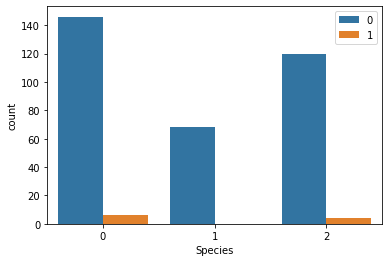

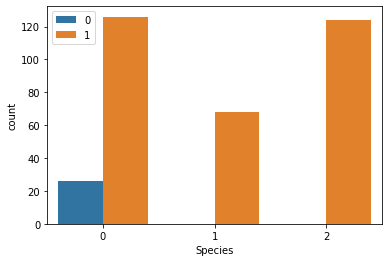

In [29]:
for feature in ['Sex','Comments']:
    data = df[feature].copy()
    data = np.where(df[feature].isnull(),1,0)
    sns.countplot(df['Species'],hue=data)
    plt.show()

#### If sex is missing then the species is not of category 1

#### Since there are only 10 missing for sex, will replace it with mode and create new class for comments

In [30]:
df['Sex'] = df['Sex'].fillna('MALE')

In [31]:
uniq_vals = df['Comments'].value_counts()
print(uniq_vals)
print(sum(uniq_vals))

Nest never observed with full clutch.                                   13
Not enough blood for isotopes.                                           6
No blood sample obtained.                                                2
No blood sample obtained for sexing.                                     2
Nest never observed with full clutch. Not enough blood for isotopes.     1
Sexing primers did not amplify. Not enough blood for isotopes.           1
Adult not sampled.                                                       1
Name: Comments, dtype: int64
26


#### Since the sum of filled values is less than 10% of the data, they are rare categories so will replace it with 'Rare' and other by 'missing' 

In [32]:
df['Comments'] = np.where(df['Comments'].isnull(),'Missing','Rare')

#### Convert into label encoding

In [33]:
cat_features = [feature for feature in df.columns if df[feature].dtype == 'O' and feature != 'Species' and feature != 'Date Egg']

In [34]:
for feature in cat_features:
    df[feature] = pd.factorize(df[feature])[0]

In [35]:
df.head()

,studyName,Species,Island,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments,Delta 15 N (o/oo)NaN,Delta 13 C (o/oo)NaN
0,0,0,0,0,11/11/07,39.10,18.7,13.453624,8.229511,0,8.652405,-25.83352,0,1,1
1,0,0,0,0,11/11/07,39.50,17.4,13.638182,8.242756,1,8.949560,-24.69454,1,0,0
2,0,0,0,0,11/16/07,40.30,18.0,13.964240,8.086410,1,8.368210,-25.33302,1,0,0
3,0,0,0,0,11/16/07,44.45,17.3,14.035669,8.306472,0,8.652405,-25.83352,0,1,1
4,0,0,0,0,11/16/07,36.70,19.3,13.892444,8.146130,1,8.766510,-25.32426,1,0,0


### Handling Date feature

In [36]:
type(df['Date Egg'].iloc[0])

str

In [37]:
dd = []
mm = []
yy = []
for date in df['Date Egg']:
    s = date.split('/')
    dd.append(s[0])
    mm.append(s[1])
    yy.append(s[2])
df['DD'] = dd
df['MM'] = mm
df['YY'] = yy
df.drop('Date Egg',axis=1,inplace=True)

In [38]:
df.head()

,studyName,Species,Island,Clutch Completion,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments,Delta 15 N (o/oo)NaN,Delta 13 C (o/oo)NaN,DD,MM,YY
0,0,0,0,0,39.10,18.7,13.453624,8.229511,0,8.652405,-25.83352,0,1,1,11,11,07
1,0,0,0,0,39.50,17.4,13.638182,8.242756,1,8.949560,-24.69454,1,0,0,11,11,07
2,0,0,0,0,40.30,18.0,13.964240,8.086410,1,8.368210,-25.33302,1,0,0,11,16,07
3,0,0,0,0,44.45,17.3,14.035669,8.306472,0,8.652405,-25.83352,0,1,1,11,16,07
4,0,0,0,0,36.70,19.3,13.892444,8.146130,1,8.766510,-25.32426,1,0,0,11,16,07


In [39]:
df['YY'].value_counts()

09    120
08    114
07    110
Name: YY, dtype: int64

In [40]:
df['DD'].value_counts()

11    330
12     14
Name: DD, dtype: int64

In [41]:
df['MM'].value_counts()

9     28
27    28
16    26
13    22
15    18
18    16
21    16
3     14
17    14
4     12
14    12
6     12
22    12
25    10
10    10
29    10
12    10
1      8
24     8
8      8
28     8
19     6
11     6
20     6
2      6
23     6
30     4
26     4
7      2
5      2
Name: MM, dtype: int64

#### YY looks like categorical feature and MM can be treated as a continuous distribution. Checking relation between DD and target

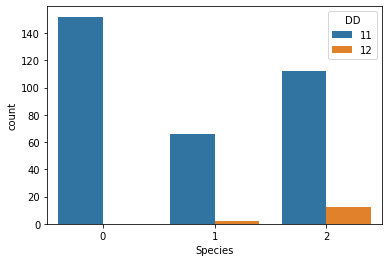

In [42]:
sns.countplot(df['Species'],hue=df['DD'])

In [43]:
# No extractable information so we can drop it
df.drop('DD',axis=1,inplace=True)

In [44]:
df['YY'] = pd.factorize(df['YY'])[0]
df['MM'] = pd.to_numeric(df['MM'])

In [45]:
df.head()

,studyName,Species,Island,Clutch Completion,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments,Delta 15 N (o/oo)NaN,Delta 13 C (o/oo)NaN,MM,YY
0,0,0,0,0,39.10,18.7,13.453624,8.229511,0,8.652405,-25.83352,0,1,1,11,0
1,0,0,0,0,39.50,17.4,13.638182,8.242756,1,8.949560,-24.69454,1,0,0,11,0
2,0,0,0,0,40.30,18.0,13.964240,8.086410,1,8.368210,-25.33302,1,0,0,16,0
3,0,0,0,0,44.45,17.3,14.035669,8.306472,0,8.652405,-25.83352,0,1,1,16,0
4,0,0,0,0,36.70,19.3,13.892444,8.146130,1,8.766510,-25.32426,1,0,0,16,0


In [46]:
final_cat_features = ['studyName','Island','Clutch Completion','Sex','Comments','Delta 15 N (o/oo)NaN','Delta 13 C (o/oo)NaN','YY']
final_numeric_features = [feature for feature in df.columns if feature not in final_cat_features and feature != 'Species']

### Feature Selection using Tree Estimators

In [52]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

In [62]:
X = df.drop('Species',axis=1)
y = df['Species']

clf = RandomForestClassifier(n_estimators=100)
clf = clf.fit(X, y)
print(clf.feature_importances_)  

[0.00245623 0.07141886 0.00137598 0.2030842  0.13856118 0.19937546
 0.08759153 0.00299672 0.07985135 0.1278206  0.00524103 0.00179046
 0.00122986 0.07350793 0.00369863]


In [63]:
model = SelectFromModel(clf,prefit=True)
X_new = model.transform(X)
X_new.shape

(344, 8)

In [64]:
df_new = pd.DataFrame(X_new,columns=[0,1,2,3,4,5,6,7])
print(df_new.head())

     0      1     2          3         4         5         6     7
0  0.0  39.10  18.7  13.453624  8.229511  8.652405 -25.83352  11.0
1  0.0  39.50  17.4  13.638182  8.242756  8.949560 -24.69454  11.0
2  0.0  40.30  18.0  13.964240  8.086410  8.368210 -25.33302  16.0
3  0.0  44.45  17.3  14.035669  8.306472  8.652405 -25.83352  16.0
4  0.0  36.70  19.3  13.892444  8.146130  8.766510 -25.32426  16.0


In [67]:
sum(df_new[0] == df['Island']) == 344

True

In [69]:
df.head()

,studyName,Species,Island,Clutch Completion,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments,Delta 15 N (o/oo)NaN,Delta 13 C (o/oo)NaN,MM,YY
0,0,0,0,0,39.10,18.7,13.453624,8.229511,0,8.652405,-25.83352,0,1,1,11,0
1,0,0,0,0,39.50,17.4,13.638182,8.242756,1,8.949560,-24.69454,1,0,0,11,0
2,0,0,0,0,40.30,18.0,13.964240,8.086410,1,8.368210,-25.33302,1,0,0,16,0
3,0,0,0,0,44.45,17.3,14.035669,8.306472,0,8.652405,-25.83352,0,1,1,16,0
4,0,0,0,0,36.70,19.3,13.892444,8.146130,1,8.766510,-25.32426,1,0,0,16,0


### Features Island, Culmen Length, Culmen Depth, Flipper Length, Body Mass, Delta 15, Delta 13 and MM are the most important

In [73]:
final_df = df[['Island','Culmen Length (mm)','Culmen Depth (mm)','Flipper Length (mm)','Body Mass (g)','Delta 15 N (o/oo)','Delta 13 C (o/oo)','MM','Species']]

In [74]:
final_df.head()

,Island,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Delta 15 N (o/oo),Delta 13 C (o/oo),MM,Species
0,0,39.10,18.7,13.453624,8.229511,8.652405,-25.83352,11,0
1,0,39.50,17.4,13.638182,8.242756,8.949560,-24.69454,11,0
2,0,40.30,18.0,13.964240,8.086410,8.368210,-25.33302,16,0
3,0,44.45,17.3,14.035669,8.306472,8.652405,-25.83352,16,0
4,0,36.70,19.3,13.892444,8.146130,8.766510,-25.32426,16,0


In [75]:
csv_file = final_df.to_csv('Final_df.csv',index=False)